### Import Packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from citipy import citipy
import requests
import json
from api_keys import weather_api_key
import numpy as np

## Part I - WeatherPy

#### Getting 500 or more random cities

In [2]:
# Create 1500 random latitude and longtitutde values
# some coordinates might be similar so when using citipy to find the nearest city,
# some cities might be duplicated so we create extra coordinates just in case

lat = np.random.uniform(-90,90,1500)
long = np.random.uniform(-180,180,1500)


In [3]:
# create a dataframe for the coordinates
city_info = pd.DataFrame({'lat':lat,'long':long})

In [4]:
# store city names of the closest city to the coordinates

city_name = []
country_code = []
for row in range(len(city_info)):
    lat_cord = city_info.iloc[row][0]
    long_cord = city_info.iloc[row][1]
    city = citipy.nearest_city(lat_cord,long_cord)
    city_name.append(city.city_name)
    country_code.append(city.country_code)
    

In [5]:
# add closest city and country codes to data frame
city_info['closest city'] = city_name
city_info['country code'] = country_code
city_info

,lat,long,closest city,country code
0,24.349897,-12.655966,atar,mr
1,44.658395,-114.138179,hailey,us
2,35.963911,146.602162,kamaishi,jp
3,31.240308,-80.264568,wilmington island,us
4,30.561670,-92.332409,eunice,us
...,...,...,...,...
1495,-56.382281,-140.487472,rikitea,pf
1496,77.775835,-46.753704,ilulissat,gl
1497,-75.934286,-178.594902,vaini,to
1498,-47.527502,-18.794159,arraial do cabo,br


In [6]:
# remove the duplicate cities (if any)
city_info = city_info.drop_duplicates('closest city')

# check how many unique cities we have
print(f' We have {city_info.shape[0]} unique cities')


 We have 625 unique cities


#### Using openweather API to to retrieve Temperature, Humidity, Cloudiness, Wind Speed

In [7]:
# store everything needed for the url to read the api
# url need when searching by geographical co ordinates
coord_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "&units=imperial"
weather_api_key = "&appid="+weather_api_key

In [8]:
# create extra columns in city_info
temp = []
humidity = []
cloudiness = []
wind_speed = []

In [9]:
lat = 'lat='+str(city_info['lat'][0])
long = '&lon='+str(city_info['long'][0])

# create the url
new_url = coord_url+lat+long+weather_api_key+units
    
data =requests.get(new_url).json()


{'coord': {'lon': -12.656, 'lat': 24.3499},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01d'}],
 'base': 'stations',
 'main': {'temp': 91.69,
  'feels_like': 88.81,
  'temp_min': 91.69,
  'temp_max': 91.69,
  'pressure': 1015,
  'humidity': 25,
  'sea_level': 1015,
  'grnd_level': 991},
 'visibility': 10000,
 'wind': {'speed': 14.54, 'deg': 350, 'gust': 14.29},
 'clouds': {'all': 0},
 'dt': 1631707732,
 'sys': {'country': 'MR', 'sunrise': 1631687817, 'sunset': 1631732094},
 'timezone': 3600,
 'id': 2380975,
 'name': 'Bîr Mogreïn',
 'cod': 200}

In [10]:
print('starting search...')
for row in city_info.iterrows():
    # store lat and long values
    lat = 'lat='+str(row[1]['lat'])
    long = '&lon='+str(row[1]['long'])

    # create the url
    new_url = coord_url+lat+long+weather_api_key+units
    
    # read the data of the city from the API
    data =requests.get(new_url).json()
    
    # append values to their respective lists
    temp.append(data['main']['temp'])
    humidity.append(data['main']['humidity'])
    cloudiness.append(data['clouds']['all'])
    wind_speed.append(data['wind']['speed'])
print('search done')

starting search...
search done


In [11]:
city_info['temp'] = temp
city_info['humidity'] = humidity
city_info['cloudiness'] = cloudiness
city_info['wind speed'] = wind_speed

<ipython-input-11-def40fca5ec7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_info['temp'] = temp
<ipython-input-11-def40fca5ec7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_info['humidity'] = humidity
<ipython-input-11-def40fca5ec7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#

In [12]:
city_info

,lat,long,closest city,country code,temp,humidity,cloudiness,wind speed
0,24.349897,-12.655966,atar,mr,91.69,25,0,14.54
1,44.658395,-114.138179,hailey,us,43.84,37,1,0.00
2,35.963911,146.602162,kamaishi,jp,72.01,77,100,20.51
3,31.240308,-80.264568,wilmington island,us,81.70,72,47,9.64
4,30.561670,-92.332409,eunice,us,73.40,99,95,8.19
...,...,...,...,...,...,...,...,...
1474,69.548365,146.496491,belaya gora,ru,37.71,78,96,8.30
1475,46.498418,137.971427,svetlaya,ru,45.21,86,0,4.38
1483,62.484680,16.813476,timra,se,48.15,43,3,2.13
1489,9.922785,43.598920,borama,so,85.42,32,59,9.82


### Plot Lat

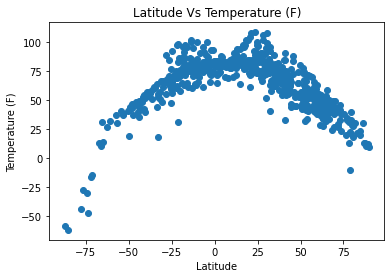

In [21]:
plt.scatter(city_info['lat'],city_info['temp'])
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.title('Latitude Vs Temperature (F)')
plt.show()

We can see that as the latitutde values approach 0. The temperature increases, but the further away the values are from 0, the lower the temperature is.

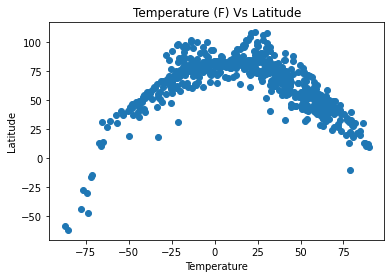

In [14]:
plt.scatter(city_info['lat'],city_info['temp'])
plt.xlabel('Temperature')
plt.ylabel('Latitude')
plt.title('Temperature (F) Vs Latitude')
plt.show()

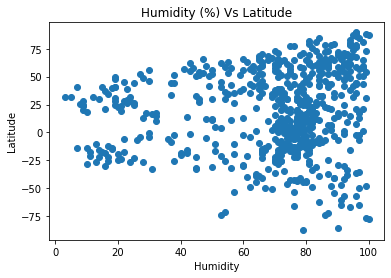

In [15]:
plt.scatter(city_info['humidity'],city_info['lat'])
plt.xlabel('Humidity')
plt.ylabel('Latitude')
plt.title('Humidity (%) Vs Latitude')
plt.show()

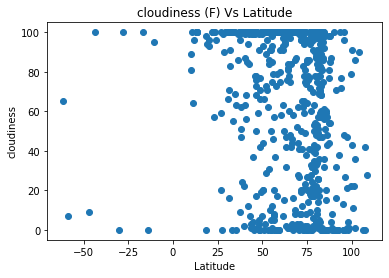

In [16]:
plt.scatter(city_info['temp'],city_info['cloudiness'])
plt.xlabel('Latitude')
plt.ylabel('cloudiness')
plt.title('cloudiness (F) Vs Latitude')
plt.show()

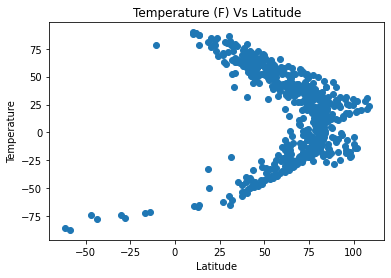

In [17]:
plt.scatter(city_info['temp'],city_info['lat'])
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.title('Temperature (F) Vs Latitude')
plt.show()